In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import root
from scipy.optimize import fsolve

#Q1.a

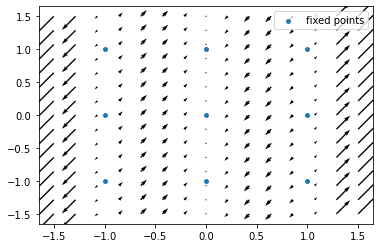

In [ ]:
x1dot = lambda u1,u2: -u1 + u1**3
x2dot = lambda x1,x2: -x1 + x1**3

# calculate x1dot and x2dot for positions x1 and x2
x1 = np.linspace(-1.5,1.5,15)
x2 = np.linspace(-1.5,1.5,15)
x1mesh,x2mesh = np.meshgrid(x1,x2)

x1dotmesh = x1dot(x1mesh,x2mesh)
x2dotmesh = x2dot(x1mesh,x2mesh)

# generate array with fixed points
fp1 = [0,-1,1]
fp2 = [0,-1,1]
fpmat = []

for i in fp1:
  for j in fp2:
    fpmat.append([i,j])
fpmat = np.array(fpmat)

# plot the phase portrait and the fixed points
plt.quiver(x1mesh,x2mesh,x1dotmesh,x2dotmesh)
plt.scatter(fpmat[:,0],fpmat[:,1],s=15, label = 'fixed points')
plt.legend()
plt.show()

In [ ]:
# calculate the eigenvalues of the fixed points which indicate stability
eigenval = lambda x1,x2 : np.sqrt((x1**2-1)*(x2**2-1))
evals = eigenval(fpmat[:,0]+0J,fpmat[:,1]+0J)

for i in range(len(fpmat)):
  print('for FP = {}, the eigenvalues are +{:.3f} and -{:.3f}'.format(fpmat[i],evals[i],evals[i]))

for FP = [0 0], the eigenvalues are +1.000-0.000j and -1.000-0.000j
for FP = [ 0 -1], the eigenvalues are +0.000+0.000j and -0.000+0.000j
for FP = [0 1], the eigenvalues are +0.000+0.000j and -0.000+0.000j
for FP = [-1  0], the eigenvalues are +0.000+0.000j and -0.000+0.000j
for FP = [-1 -1], the eigenvalues are +0.000-0.000j and -0.000-0.000j
for FP = [-1  1], the eigenvalues are +0.000+0.000j and -0.000+0.000j
for FP = [1 0], the eigenvalues are +0.000+0.000j and -0.000+0.000j
for FP = [ 1 -1], the eigenvalues are +0.000+0.000j and -0.000+0.000j
for FP = [1 1], the eigenvalues are +0.000+0.000j and -0.000+0.000j


Therefore we obtain the stabilities of the fixed points:

FP = [0,0] is a saddle point

All other fixed points are circles


#Q1.b

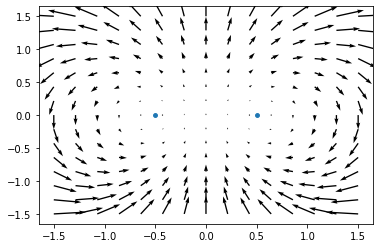

In [ ]:
x1dot = lambda x1,x2: 2*x1*x2
x2dot = lambda x1,x2: 1/4 - x1**2 + x2**2

x1 = np.linspace(-1.5,1.5,15)
x2 = np.linspace(-1.5,1.5,15)
x1mesh,x2mesh = np.meshgrid(x1,x2)

x1dotmesh = x1dot(x1mesh,x2mesh)
x2dotmesh = x2dot(x1mesh,x2mesh)

# plot the phase portrait and the fixed points
plt.quiver(x1mesh,x2mesh,x1dotmesh,x2dotmesh)
plt.scatter([0.5,-0.5],[0,0],s=15,label='fixed points')
plt.show()

#Q1.c

## Plotting functions of x1 for visual inspection

In [ ]:
x1_F = np.linspace(-5,5,100)
y_F = np.zeros(100)

# intersection of the nullclines for equating equations of x2
F = lambda x1,a : -a**2 * x1**4 -a**2 * x1**3 - x1**2 - 2*x1 -1

roots_x1 = []
roots_x2 = []

length = 11
a_arr = np.linspace(-5,5,length)

for a in a_arr:
  plt.plot(x1_F,F(x1_F,a))
  root_x1 = root(F,-1,args = (a)).x
  roots_x1.append(root_x1)
  
  root_x2 = -(root_x1+1)/(a*root_x1)
  roots_x2.append(root_x2)

plt.plot(x1_F,y_F,linewidth= 3)
plt.xlim([-4,4])
plt.show()

roots_x1 = np.array(roots_x1).flatten()
roots_x2 = np.array(roots_x2).flatten()

NameError: ignored

In [ ]:
print(roots_x1,roots_x2)

In [ ]:
def eigenvalues(x1,x2):
  jac = [[x2+a*x2**2,1+x1+2*a*x1*x2],[-1-2*x1,2*x2]]
  evals = np.linalg.eigvals(jac)
  return evals

print('roots x1:',roots_x1)
print('roots x2:',roots_x2)
print('')
print('eigenvalues for (-1,0)=',eigenvalues(-1,0))
print('eigenvalues for (0,0)=',eigenvalues(0,0))

# evaluate accuracy of FP, xdotvals should all be 0 for FP
x1dot = lambda x1,x2,a: x2 + x1*x2 + a * x1 * x2**2
x2dot = lambda x1,x2,a: -x1-x1**2 + x2**2

x1dotvals = []
x2dotvals = []

for i, a in enumerate(a_arr):
  x1dotvals.append(x1dot(roots_x1[i],roots_x2[i],a))
  x2dotvals.append(x2dot(roots_x1[i],roots_x2[i],a))

print('')
print('x1dot:',x1dotvals)
print('x2dot:',x2dotvals)
print('nan for a = 0')

In [ ]:
rootsx1 = -np.ones(length)
rootsx2 = np.zeros(length)
zerovals = np.zeros(length)

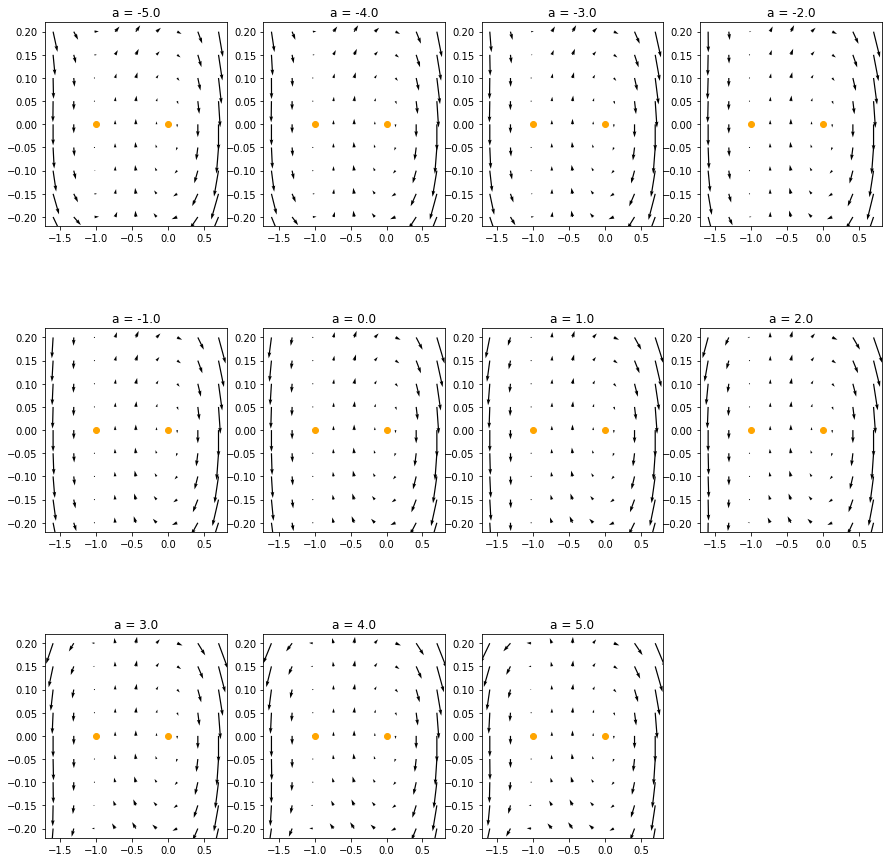

In [ ]:
x1dot = lambda x1,x2,a: x2 + x1*x2 + a * x1 * x2**2
x2dot = lambda x1,x2,a: -x1-x1**2 + x2**2

plt.figure(figsize=(15, 15))
plt.subplots_adjust(hspace=0.5)

for i,a in enumerate(a_arr):
  ax = plt.subplot(3,4, i + 1)

  x1 = np.linspace(-1.6,0.7,9)
  x2 = np.linspace(-0.2,0.2,9)
  x1mesh,x2mesh = np.meshgrid(x1,x2)

  x1dotmesh = x1dot(x1mesh,x2mesh,a)
  x2dotmesh = x2dot(x1mesh,x2mesh,a)

  # plot the phase portrait and the fixed points
  ax.quiver(x1mesh,x2mesh,x1dotmesh,x2dotmesh)
  ax.scatter(rootsx1[i],rootsx2[i],c='orange')
  ax.scatter(zerovals[i],zerovals[i],c='orange')
  ax.set_title('a = {}'.format(a))
  # plt.show()

In [ ]:
# plotting nullclines:
# x2 = np.linspace(-5,5,100)
# a = [-5,-3,-2,-1,0,1,2,3,5]

# for a in a:
#   nc_x1_1 = - x2 / (x2 + a*x2**2)
#   nc_x1_2_pos = 0.5 * (np.sqrt(1-4*x2**2)-1)
#   nc_x1_2_neg = 0.5 * (np.sqrt(1-4*x2**2)-1)
#   plt.plot(x2,nc_x1_1,label = 'nullcline 1')
#   plt.plot(x2,nc_x1_2_neg,label = 'nullcline 2, -')
#   plt.plot(x2,nc_x1_2_pos,label = 'nullcline 2, +')
#   plt.title('nullclines plotted for a = {}'.format(a))
#   plt.legend()
#   plt.show()